# Wind correlation with water mass volumes are analyzed here

Make sure to run the Python notebooks in the following order:
1. MEOP_Preprocessing_data_SO.ipynb - if you want to generate the dfmg.csv from scratch yourself. Else, use the file provided.
2. MEOP_Analysis_Part1_OSFcopy.ipynb
3. WaterMassThickness_OSFcopy.ipynb
4. Wind_Stress_Analysis_OSFcopy.ipynb

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import gsw
import importlib
import numpy.ma as ma

In [2]:
import pdb
from mpl_toolkits.basemap import Basemap, cm
from matplotlib.colors import LinearSegmentedColormap
from IPython.display import Image
import matplotlib.colors as colors
from scipy.interpolate import griddata
import geopandas as gpd
from shapely.geometry import Point
from scipy.stats import gaussian_kde
import xarray as xr
import matplotlib
import matplotlib.gridspec as gridspec 
from matplotlib.colorbar import Colorbar 

In [3]:
waterMassThickness = pd.read_csv("./waterMassThickness_20_winds.csv")

In [6]:
waterMassThickness = pd.read_csv("./waterMassThickness_20.csv")
del(waterMassThickness["Unnamed: 0"])

In [7]:
waterMassThickness.columns

Index(['DSW', 'DSW_CI', 'ISW', 'ISW_CI', 'LSSW', 'LSSW_CI', 'mCDW', 'mCDW_CI',
       'CDW', 'CDW_CI', 'zlowest', 'month', 'region'],
      dtype='object')

In [4]:
waterMassThickness

,DSW,DSW_CI,ISW,ISW_CI,LSSW,LSSW_CI,mCDW,mCDW_CI,CDW,CDW_CI,zlowest,month,region
0,0.000000,[0. 0.],21.760023,[ 0. 21.76002277],43.520046,[43.52004555 65.28006832],0.000000,[0. 0.],0.000000,[0. 0.],174.080182,1,WS-NIS
1,40.203657,[-20.10182872 60.30548615],221.120116,[160.81462974 261.32377333],100.509144,[100.50914359 120.6109723 ],20.101829,[-20.10182872 40.20365743],0.000000,[0. 0.],743.767663,2,WS-NIS
2,161.946127,[121.45959501 202.43265834],202.432658,[161.94612667 263.16245585],101.216329,[ 80.97306334 101.21632917],101.216329,[ 80.97306334 101.21632917],0.000000,[0. 0.],789.487368,3,WS-NIS
3,40.058916,[ 0. 60.08837463],220.324040,[180.26512389 240.35349852],160.235666,[140.20620747 180.26512389],120.176749,[100.14729105 140.20620747],0.000000,[0. 0.],701.031037,4,WS-NIS
4,20.097348,[ 0. 20.09734802],200.973480,[200.97348019 200.97348019],180.876132,[160.77878415 181.37856587],120.584088,[ 80.38939208 120.58408812],0.000000,[0. 0.],683.309833,5,WS-NIS
5,40.648793,[20.32439646 81.29758583],243.892757,[203.24396456 304.86594684],284.541550,[223.56836102 304.86594684],81.297586,[20.32439646 81.29758583],0.000000,[0. 0.],752.002669,6,WS-NIS
6,0.000000,[0. 0.],361.297915,[321.15370193 421.51423378],100.360532,[ 60.21631911 140.50474459],140.504745,[120.43263822 180.64895734],0.000000,[0. 0.],742.667936,7,WS-NIS
7,0.000000,[-40.82694469 0. ],489.923336,[469.50986388 633.32797943],0.000000,[-20.41347234 0. ],40.826945,[-20.41347234 81.65388937],0.000000,[0. 0.],836.952366,8,WS-NIS
8,40.231266,[ 0. 80.46253213],663.815890,[603.46899099 744.27842222],0.000000,[0. 0.],0.000000,[-40.23126607 0. ],0.000000,[0. 0.],824.740954,9,WS-NIS
9,0.000000,[0. 0.],81.650877,[ 20.41271933 122.98663395],0.000000,[-102.06359664 0. ],0.000000,[-20.41271933 0. ],0.000000,[0. 0.],387.841667,10,WS-NIS


<IPython.core.display.Javascript object>


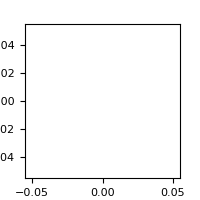

In [415]:
%matplotlib notebook
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

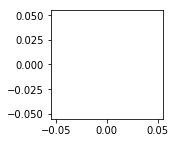

In [427]:
%matplotlib inline
plt.figure(figsize=(2,2))
plt.plot()
plt.show()

## Provide path to ERA interim data folder below

In [35]:
!ls ../../../Winds/ERA_interim/ -1 > ../../../Winds/list_files.txt

In [36]:
!ls ../../../Winds/ERA_interim/ -1

winds2004_monthly.nc
winds2005_monthly.nc
winds2006_monthly.nc
winds2007_monthly.nc
winds2008_monthly.nc
winds2009_monthly.nc
winds2010_monthly.nc
winds2011_monthly.nc
winds2012_monthly.nc
winds2013_monthly.nc
winds2014_monthly.nc
winds2015_monthly.nc
winds2016_monthly.nc
winds2017_monthly.nc


In [4]:
winds = []
with open("../../../Winds/list_files.txt") as file_list:
    for line in file_list:
        winds.append(xr.open_dataset("../../../Winds/ERA_interim/"+line.split("\n")[0]))

In [66]:
winds[-1]

<xarray.Dataset>
Dimensions:    (latitude: 241, longitude: 480, time: 12)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 ... 357.75 358.5 359.25
  * latitude   (latitude) float32 90.0 89.25 88.5 87.75 ... -88.5 -89.25 -90.0
  * time       (time) datetime64[ns] 2017-01-01 2017-02-01 ... 2017-12-01
Data variables:
    u10        (time, latitude, longitude) float32 0.5225267 ... -1.5538766
    v10        (time, latitude, longitude) float32 -3.8303049 ... -3.1251037
    iews       (time, latitude, longitude) float32 ...
    inss       (time, latitude, longitude) float32 ...
Attributes:
    Conventions:  CF-1.6
    history:      2018-09-20 05:16:25 GMT by grib_to_netcdf-2.8.0: grib_to_ne...

In [75]:
x = np.arange(5)
y = np.random.randn(5, 5)
y[0, :] = np.arange(5)
#np.gradient(y, -1, 0.5)
np.gradient(y[0], 0.5)

array([2., 2., 2., 2., 2.])

In [74]:
y

array([[ 0.        ,  1.        ,  2.        ,  3.        ,  4.        ],
       [-1.061539  ,  1.10021788, -0.48173321, -0.6538716 ,  1.2330119 ],
       [ 1.33291746,  0.23086709,  0.17559613, -0.63007616,  0.21009618],
       [-1.37047235,  0.32002102,  1.64420112,  0.12771594,  0.05126094],
       [-1.22143701, -1.2761787 , -0.31084302, -0.55166166, -0.16867602]])

In [5]:
# This function is not used, instead, iews and inss are used.

def compute_stress(U):
    C_D = np.ones(U.shape) * 1.2e-3
    C_D = np.where((U > 4) & (U < 11), 1.2e-3,0.0 )
    indices = np.argwhere(((U>=11) & (U<25)))
    indrav = np.ravel(indices)
    C_D[indrav[::3], indrav[1::3], indrav[2::3]] = 1e-3* (0.49 + 0.065 * U[indrav[::3], indrav[1::3], indrav[2::3]])
    
    return C_D * 1.22 * U**2

In [51]:
def compute_clim_stress_curl(winds):
    stress_curl_clim = np.zeros_like(winds[0].iews)
    iews_clim = np.zeros_like(winds[0].iews)
    inss_clim = np.zeros_like(winds[0].iews)
    tauy_x = np.zeros_like(winds[0].iews)
    taux_y = np.zeros_like(winds[0].iews)
    
    for i in range(len(winds)):
        for mon in range(12):
            iews_clim[mon] += winds[i].iews[mon].values
            inss_clim[mon] += winds[i].inss[mon].values
    for mon in range(12):
        iews_clim[mon] = iews_clim[mon] / float(len(winds))
        inss_clim[mon] = inss_clim[mon] / float(len(winds))
        
    delta_lat = abs(float(winds[0].latitude[0] - winds[0].latitude[1]))
    delta_lon = abs(float(winds[0].longitude[0] - winds[0].longitude[1]))
    r = 6371e3 # radius of earth in metres
    dy = abs(float(r * np.deg2rad(delta_lat)))
    
    for mon in range(12):
        for lati in range(len(winds[0].latitude)):
            dx = abs(float(r * np.cos(np.deg2rad(winds[0].latitude[lati]) ) * np.deg2rad(delta_lon)))
            tauy_x[mon][lati, :] = np.gradient(inss_clim[mon][lati,:], dx)
            
        taux_y[mon], _ = np.gradient(iews_clim[mon][:, :], -dy, dx )
        
        stress_curl_clim[mon] = tauy_x[mon] - taux_y[mon]
        
    return stress_curl_clim

In [52]:
stress_curl_clim = compute_clim_stress_curl(winds)

In [12]:
import plot_topView_contourf as topView
importlib.reload(topView)

<module 'plot_topView_contourf' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_topView_contourf.py'>

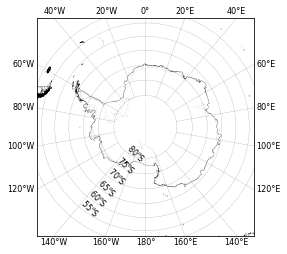

In [13]:
mWhole = topView.createMapProjections(-90, 0, region="Whole")

In [9]:
from matplotlib import ticker, cm
def plot_scalar_field(sclr, lons, lats, m=None, bathy=None, plotBathy=True, save=False, savename="untitled.png", 
                     levs=None, drawMeridians=True, meridians=None, units=None, extend="both", cmap="coolwarm",
                     annotate=True, fontsize=8):
    plt.close(1)
    fig = plt.figure(1, figsize=(10,10))
    gs = gridspec.GridSpec(2, 2, height_ratios=[1, 0.05], width_ratios=[1, 0.05])
    mapax = plt.subplot(gs[0,0])
    if(annotate == True):
        parallels = np.arange(-80, -50+1, 5.)    
        m.drawparallels(parallels,labels=[0,0,0,0], linewidth=0.2) # labels: left,right,top,bottom
        
        xy = [[-140, -55], [-140, -60] , [-140, -65], [-140, -70], [-140, -75] , [-140, -80]]
        xytext = np.arange(55, 81, 5)
        for i in range(len(xytext)):
            mxy = m(xy[i][0], xy[i][1])
            plt.annotate(str(xytext[i])+"$^o$S", xy=(mxy[0], mxy[1]), rotation=-45, fontsize=fontsize)    
            
    colorbar_ax = plt.subplot(gs[1,0])
    
    if plotBathy:
        bathycolorbar = plt.subplot(gs[0, 1])
    
    X, Y = np.meshgrid(lons, lats)
    
    if not m:
        m = topView.createMapProjections(-90, 0, region="Whole")
        
    CF = m.contourf(X, Y, sclr, ax=mapax, latlon=True, levels=levs, extend=extend, cmap=cmap, origin="lower")
    cbar1 = Colorbar(ax = colorbar_ax, mappable = CF, orientation = 'horizontal')
    cbar1.ax.set_xlabel(units)
    
    if(plotBathy == True):
        if not bathy:
            bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')
        lonlen = len(bathy.lon)
        lonindices = np.arange(0, lonlen+1, 30)
        lonindices[-1] = lonindices[-1] - 1
        bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 5))
        clevs = np.array([-100, -500, -1000, -1500, -2000, -3000])[::-1]
        
        longrid, latgrid = np.meshgrid(bathyS.lon.values, bathyS.lat.values)
        cs = m.contour(longrid, latgrid, bathyS.elevation.where(bathyS.elevation <= 0).values,  latlon=True, 
                       levels=clevs, linewidths=0.2, extend='min', ax=mapax ) #, cmap="RdYlBu"
        cbar1 = Colorbar(ax = bathycolorbar, mappable = cs, orientation = 'vertical')
        cbar1.ax.get_children()[0].set_linewidths(5)
        cbar1.set_label('Depth (m)')
     
    m.drawcoastlines(ax=mapax)
    
    if drawMeridians:
        if not meridians:
            meridians = np.arange(-180, 180, 20)
        m.drawmeridians(meridians,labels=[1,1,1,1], linewidth=0.2, ax=mapax)
    
    if save:
        plt.savefig(savename, dpi=600)
    
    plt.show()    

In [10]:
bathy = xr.open_dataset('/media/data/Datasets/Bathymetry/GEBCO_2014_2D.nc')

In [14]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 30)
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

In [9]:
winds[0].longitude 

<xarray.DataArray 'longitude' (longitude: 480)>
array([   0.  ,    0.75,    1.5 , ...,  357.75,  358.5 ,  359.25], dtype=float32)
Coordinates:
  * longitude  (longitude) float32 0.0 0.75 1.5 2.25 3.0 3.75 4.5 5.25 6.0 ...
Attributes:
    units:      degrees_east
    long_name:  longitude

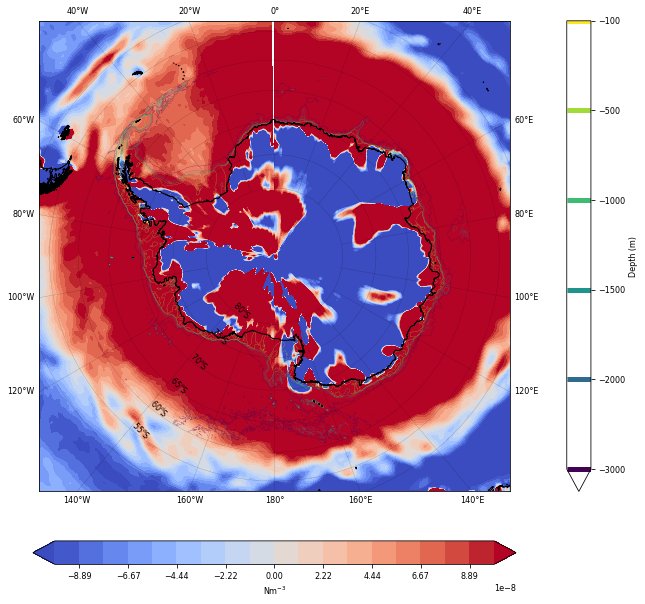

In [54]:
plot_scalar_field(-np.mean(stress_curl_clim, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=np.linspace(-1e-7, 1e-7, 19), save=True, savename="./Images/wind/stress_curl_net_clim.png", 
                  drawMeridians=True, plotBathy=True, units="Nm$^{-3}$")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


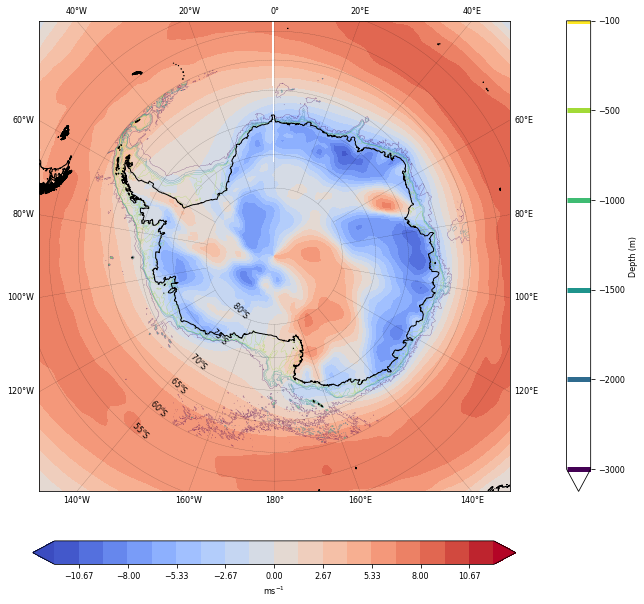

In [292]:
plot_scalar_field(np.mean(wind_clim_monthly, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=list(np.linspace(-12,12,19) ), save=True, 
                  savename="./Images/wind/U10_net_clim.png", units="ms$^{-1}$",
                  drawMeridians=True, plotBathy=True)

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3505: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3572: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


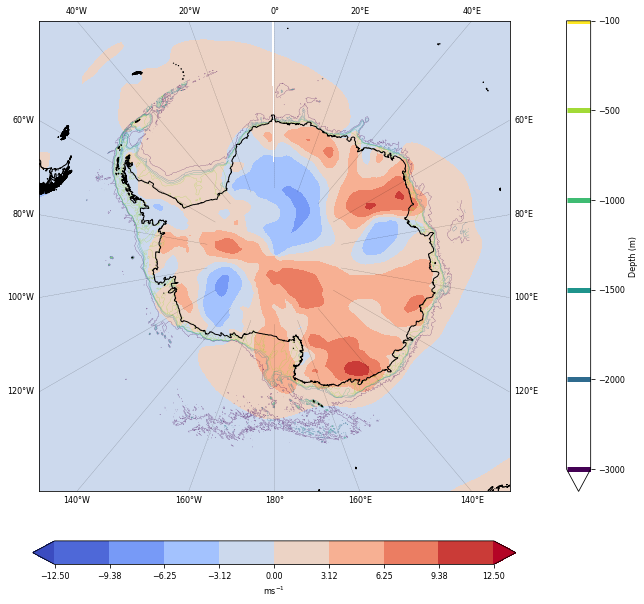

In [183]:
plot_scalar_field(np.mean(v10_clim_monthly, axis=0), winds[0].longitude.values, winds[0].latitude.values, m=mWhole, 
                  levs=list(np.linspace(-12.5,12.5,9)), 
                  save=True, savename="./Images/wind/V10_net_clim.png", units="ms$^{-1}$",
                  drawMeridians=True, plotBathy=True)

## Computing bathymetry gradient to identify the slope

In [15]:
import plot_bathymetryGradients as pbgrad
importlib.reload(pbgrad)

<module 'plot_bathymetryGradients' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_bathymetryGradients.py'>

In [15]:
bathyS  = xr.open_dataset("/media/hdd2/SOSE_1_12/bathyS.nc")
#bathy_gradient = bathyS.bathy_gradient.values

In [33]:
bathyS

<xarray.Dataset>
Dimensions:              (lat: 3600, lon: 8641)
Coordinates:
  * lon                  (lon) float64 -180.0 -180.0 -179.9 ... 180.0 180.0
  * lat                  (lat) float64 -90.0 -89.99 -89.98 ... -60.01 -60.0
Data variables:
    elevation            (lat, lon) float32 ...
    bathy_gradient       (lat, lon) float32 ...
    bathy_gradient_mask  (lat, lon) bool ...
Attributes:
    Conventions:  CF-1.6
    title:        The GEBCO_2014 Grid - a continuous terrain model for oceans...
    institution:  On behalf of the General Bathymetric Chart of the Oceans (G...
    source:       The bathymetric portion of the GEBCO_2014 Grid was largely ...
    history:      This is version 20150318 of the data set. Information on th...
    references:   Information on the data set is available from the GEBCO pro...
    comment:      The data in the GEBCO_2014 Grid should not be used for navi...
    node_offset:  1

In [43]:
slopeMask & ma.masked_where(((bathyS.bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800)), 
                           bathyS.elevation)

TypeError: ufunc 'bitwise_and' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

In [16]:
bathy_gradient = pbgrad.compute_bathymetryGradients(lonstep=5, latstep=1)

In [11]:
lonlen = len(bathy.lon)
lonindices = np.arange(0, lonlen+1, 5) # lonstep=5, every 5th longitude
lonindices[-1] = lonindices[-1] - 1
bathyS = bathy.isel(lon=lonindices, lat=np.arange(0, 3600, 1))

NameError: name 'bathy' is not defined

In [16]:
slopeLonLatLims = np.array([ [-50.,-25., -75, -71] , [-25, -5, -80, -65], [-5, 0, -85, -67.6], 
                            [0,8, -85, -67.6], [8,46.9832, -80, -60], [46.9832, 48.3, -66.7, -60],
                            [48.3, 49.118, -80, -60], [49.118, 50.139, -66.455, -60], [50.139, 57.4, -80, -60],
                            [57.4, 58.9, -66.47, -60],[58.9, 59.68, -66.7, -60], [59.68, 60, -80, -60],
                            [60, 61.5, -66.85, -60], [61.5, 64, -80, -60], [64, 66, -67.1, -60],
                            [66, 79.4, -67.5, -63.5], [79.4, 81.5, -66.7, -64], [81.5, 89.68, -80, -64],
                            [89.68, 92.5, -65.8, -60], [92.5, 92.7, -80, -60], [92.7, 101, -65.1, -60],
                            [101, 103, -65, -60], [103, 105, -80, -60], [105, 109.5, -65.5, -60],
                            [109.5, 113, -65.9, -60], [113, 115, -65.47, -60], [115, 122, -80, -60], 
                            [122, 126, -66, -60], [126, 134, -65.3, -63], [134, 135, -65, -63],
                            [135, 148.6, -66.25, -63], [148.6, 160, -80, -65], [160, 170, -73, -65],
                            [170, 180, -73.6, -66.78], [-180, -170, -80, -70], [-170, -160, -80, -73],
                            [-160, -151.3, -76.6, -73], [-151.3, -148.7, -76, -73], [-148.7, -140, -80, -73],
                            [-140, -136, -74.38, -71], [-136, -132, -74.3, -71], [-132, -130, -73.9, -71],
                            [-130, -120, -73.26, -70], [-120, -110, -72.8, -70], [-110, -100, -72, -70],
                            [-100, -90, -71.6, -69.3], [-90, -80, -71, -67.8], [-80, -75, -69.5, -65],
                            [-75, -72, -68.4, -65], [-72, -70, -67.6, -65], [-70, -68, -66.2, -63],
                            [-68, -66, -65, -63], [-66, -64, -64, -62.7], [-64, -62.37, -63.1, -61.86],
                            [-62.37, -62, -62.7, -61.86], [-62, -60, -62.55, -61], [-60, -58, -62, -60.8],
                            [-58, -56, -61.5, -60.6],
                            [-56, -50, -80, -60]] )

In [17]:
slopeMask = np.zeros(bathyS.elevation.shape, dtype=bool)
for i in range(len(slopeLonLatLims)):
    slopeMask = slopeMask + ~np.isnan(bathyS.elevation.where\
                                        (bathyS.lon >= slopeLonLatLims[i][0]).where\
                                        (bathyS.lon <= slopeLonLatLims[i][1]).where\
                                        (bathyS.lat >= slopeLonLatLims[i][2]).where\
                                        (bathyS.lat <= slopeLonLatLims[i][3]).values)


In [32]:
bathy_gradient = ma.masked_array(np.array(bathy_gradient))
bathy_gradient.mask = slopeMask & ((bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800))

NameError: name 'bathy_gradient' is not defined

In [33]:
XX, YY = np.meshgrid(bathyS.lon, bathyS.lat)

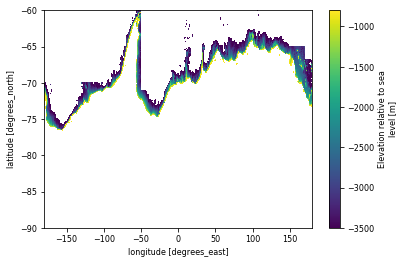

In [45]:
bathyS.elevation.where(slopeMask & ~bathyS.bathy_gradient_mask).plot()

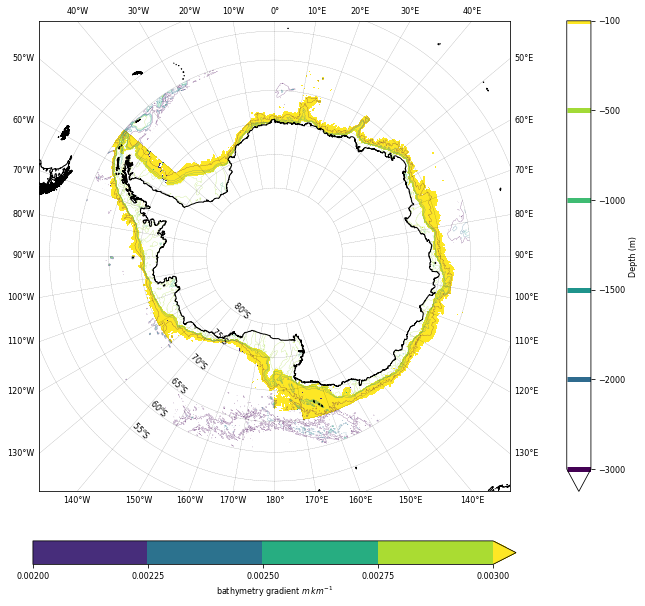

In [47]:
plot_scalar_field(bathyS.bathy_gradient.where(slopeMask & ~bathyS.bathy_gradient_mask), 
                  bathyS.lon, bathyS.lat, m=mWhole,  
                  meridians=list(np.arange(-180, 180, 10)), levs=list(np.linspace(0.002, 3e-3, 5)), save=True,
                  units="bathymetry gradient $m\,km^{-1}$", extend="max", cmap="viridis", plotBathy=True,
                  savename="./Images/bathygradient.png")

/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3608: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/home/km/anaconda2/envs/py35new/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3677: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


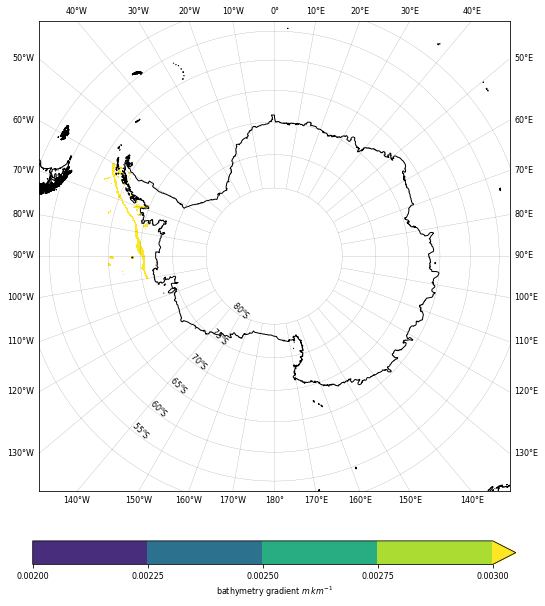

In [213]:
plot_scalar_field(ma.masked_array(np.array(bathy_gradient), mask=regionalMasks[20] ), bathyS.lon, bathyS.lat, m=mWhole,  
                  meridians=list(np.arange(-180, 180, 10)), levs=list(np.linspace(0.002, 3e-3, 5)), 
                  units="bathymetry gradient $m\,km^{-1}$", extend="max", cmap="viridis", plotBathy=False,
                 save=True, savename="./Images/arbit.png")

In [34]:
def compute_clim_monthly(winds, var="u10"):
    
    no_years = len(winds)
    
    wind_clim_monthly = [0]*12
    
    for i in range(no_years):
        for mon in range(12):
            wind_clim_monthly[mon] += winds[i][var].values[mon]
    
    for mon in range(12):
        wind_clim_monthly[mon] = wind_clim_monthly[mon] / float(no_years)
        
    return wind_clim_monthly

In [35]:
u10_clim_monthly = compute_clim_monthly(winds)

In [36]:
v10_clim_monthly = compute_clim_monthly(winds, var="v10")

# Converting from 0$^o$ - 360$^o$ longitudes to -180$^o$ to +180$^o$ longitudes

In [37]:
wXX, wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)

In [38]:
wXX[wXX > 180] = wXX[wXX > 180] - 360
wXX[0]

array([   0.  ,    0.75,    1.5 ,    2.25,    3.  ,    3.75,    4.5 ,
          5.25,    6.  ,    6.75,    7.5 ,    8.25,    9.  ,    9.75,
         10.5 ,   11.25,   12.  ,   12.75,   13.5 ,   14.25,   15.  ,
         15.75,   16.5 ,   17.25,   18.  ,   18.75,   19.5 ,   20.25,
         21.  ,   21.75,   22.5 ,   23.25,   24.  ,   24.75,   25.5 ,
         26.25,   27.  ,   27.75,   28.5 ,   29.25,   30.  ,   30.75,
         31.5 ,   32.25,   33.  ,   33.75,   34.5 ,   35.25,   36.  ,
         36.75,   37.5 ,   38.25,   39.  ,   39.75,   40.5 ,   41.25,
         42.  ,   42.75,   43.5 ,   44.25,   45.  ,   45.75,   46.5 ,
         47.25,   48.  ,   48.75,   49.5 ,   50.25,   51.  ,   51.75,
         52.5 ,   53.25,   54.  ,   54.75,   55.5 ,   56.25,   57.  ,
         57.75,   58.5 ,   59.25,   60.  ,   60.75,   61.5 ,   62.25,
         63.  ,   63.75,   64.5 ,   65.25,   66.  ,   66.75,   67.5 ,
         68.25,   69.  ,   69.75,   70.5 ,   71.25,   72.  ,   72.75,
         73.5 ,   74

In [39]:
u10_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    u10_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                               u10_clim_monthly[i].flatten(), 
                                      (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [40]:
v10_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    v10_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                              v10_clim_monthly[i].flatten(), 
                                    (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [55]:
stress_curl_clim_monthly_interpd = []
wXX , wYY = np.meshgrid(winds[0].longitude.values, winds[0].latitude.values)
wXX[wXX > 180] = wXX[wXX > 180] - 360
for i in range(12):
    print("month = ",i)
    stress_curl_clim_monthly_interpd.append( griddata(np.array([wXX.flatten(), wYY.flatten()]).T, 
                                                      stress_curl_clim[i].flatten(), 
                                             (XX, YY), method='nearest' ) )

month =  0
month =  1
month =  2
month =  3
month =  4
month =  5
month =  6
month =  7
month =  8
month =  9
month =  10
month =  11


In [354]:
## Plays a beep sound. Useful to notify once any script is done running
def play_beep():
    import os
    duration = 1  # second
    freq = 440  # Hz
    os.system('play --no-show-progress --null --channels 1 synth %s sine %f' % (duration, freq))
play_beep()

In [35]:
bathyS.bathy_gradient_mask

<xarray.DataArray 'bathy_gradient_mask' (lat: 3600, lon: 8641)>
[31107600 values with dtype=bool]
Coordinates:
  * lon      (lon) float64 -180.0 -180.0 -179.9 -179.9 ... 179.9 180.0 180.0
  * lat      (lat) float64 -90.0 -89.99 -89.98 -89.97 ... -60.02 -60.01 -60.0

In [42]:
def compute_monthly_clim_means_lonlimited_slope(lonlim, latlim, wind_interpd = stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ~((~bathyS.bathy_gradient_mask) & slopeMask &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean, wind_interpd[0].mask

In [43]:
def compute_monthly_clim_means_lonlimited(lonlim, latlim, wind_interpd = stress_curl_clim_monthly_interpd):
    clim_monthly_lonlimited_mean = np.zeros(12)
    
    for m in range(12):
        wind_interpd[m] = ma.masked_array(np.array(wind_interpd[m]), 
                                                    mask = ( ((bathyS.elevation > 0) & (bathyS.elevation < -3000) )| 
                                                            ~((XX > lonlim[0]) & (XX < lonlim[1]) & (YY > latlim[0])
                                                              & (YY < latlim[1])) ))
        
        clim_monthly_lonlimited_mean[m] = wind_interpd[m].mean()
    return clim_monthly_lonlimited_mean

In [56]:
waterMassThickness["stress_curl_slope_MonMean"] = 0.0

In [59]:
waterMassThickness.loc[waterMassThickness.region.str.contains("A2"), "region"].unique()

array([], dtype=object)

In [60]:
waterMassThickness.loc[waterMassThickness.region.str.contains("A1"), "region"].unique()

array([], dtype=object)

In [45]:
import re
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

wmA2regions = waterMassThickness.region.str.contains("DIS")
regionsA2 = waterMassThickness.loc[wmA2regions, "region"].unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-77., -72], [-68., -66.47], [-69.75, -66.35],
                   [-69.75, -65.215], [-67.25, -65.4], [-78., -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-72.5, -69], [-70.5, -65.38], [-67., -65.56], 
                   [-67., -64.5], [-75.25, -70.7], [-74., -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == regionsA2[i])
    
    u10MonMean = compute_monthly_clim_means_lonlimited([regionsLonlim[i][0],regionsLonlim[i][1]], 
                                                       [regionsLatlim[i][0], regionsLatlim[i][1]],
                                                                      wind_interpd=u10_clim_monthly_interpd)
    
    v10_MonMean = compute_monthly_clim_means_lonlimited([regionsLonlim[i][0], regionsLonlim[i][1]],
                                                        [regionsLatlim[i][0], regionsLatlim[i][1]],
                                                                      wind_interpd=v10_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMaskA1, "u10MonMean"] = u10MonMean
    waterMassThickness.loc[wmRegionMaskA2, "u10MonMean"] = u10MonMean
    
    waterMassThickness.loc[wmRegionMaskA1, "v10MonMean"] = v10_MonMean
    waterMassThickness.loc[wmRegionMaskA2, "v10MonMean"] = v10_MonMean

In [62]:
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()
regionsA1

array(['WS-NIS', 'CD-NIS', 'WPB-NIS', 'EPB-NIS', 'AC-NIS', 'RS-NIS',
       'PMC-NIS', 'PHC-NIS', 'LAC-NIS', 'KC-NIS', 'AS-NIS', 'BS-NIS'],
      dtype=object)

In [57]:
wmA1regions = waterMassThickness.region.str.contains("NIS")
regionsA1 = waterMassThickness.loc[wmA1regions, "region"].unique()

wmA2regions = waterMassThickness.region.str.contains("DIS")
regionsA2 = waterMassThickness.loc[wmA2regions, "region"].unique()

region1LonLims = [ [-40.,-20.] ,  [60,70], [70,75], 
                  [75,82], [135,145], [170,180]]

region1LatLims = [ [-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],
                   [-66.9, -65.215], [-66, -65.4], [-73.45, -70]]

region2LonLims = [ [-20., 0.] ,  [29,37], [82,87], 
                  [101,112], [-120,-100], [-100,-60]]

region2LatLims = [ [-73.15, -69], [-69.44, -65.38], [-66.18, -65.56], 
                   [-65.55, -64.5], [-72.7, -70.7], [-71, -61.4]]

regionsLonlim = region1LonLims + region2LonLims
regionsLatlim = region1LatLims + region2LatLims
regionalMasks = [None]* len(regionsA1)

for i in range(len(regionsLonlim)):
    wmRegionMaskA1 = (waterMassThickness.region == regionsA1[i])
    wmRegionMaskA2 = (waterMassThickness.region == regionsA2[i] )
    
    u10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]], 
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=u10_clim_monthly_interpd)
    v10_MonMeanRegional, _ = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=v10_clim_monthly_interpd)
    windStressCurl_MonMeanRegional, regionalMasks[i] = compute_monthly_clim_means_lonlimited_slope([regionsLonlim[i][0], 
                                                                         regionsLonlim[i][1]],
                                                                      [regionsLatlim[i][0],
                                                                         regionsLatlim[i][1]],
                                                                wind_interpd=stress_curl_clim_monthly_interpd)
    
    waterMassThickness.loc[wmRegionMaskA1, "u10SlopeMonMean"] = u10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "u10SlopeMonMean"] = u10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "v10SlopeMonMean"] = v10_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "v10SlopeMonMean"] = v10_MonMeanRegional
    
    waterMassThickness.loc[wmRegionMaskA1, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    waterMassThickness.loc[wmRegionMaskA2, "stress_curl_slope_MonMean"] = windStressCurl_MonMeanRegional
    
waterMassThickness["neg_u10SlopeMonMean"] = -waterMassThickness.u10SlopeMonMean
waterMassThickness["neg_stress_curl"] = -waterMassThickness.stress_curl_slope_MonMean

In [64]:
play_beep()

NameError: name 'play_beep' is not defined

In [63]:
waterMassThickness.to_csv("waterMassThickness_20_winds.csv")

In [3]:
waterMassThickness = pd.read_csv("waterMassThickness_20_winds.csv")

wmt_winds = pd.read_csv("waterMassThickness_20_winds.csv")

wmt_winds.columns

water_mass_names = waterMassThickness.columns[waterMassThickness.columns.str.contains("W")]
water_mass_names

for name in water_mass_names:
    wmt_winds[name] = waterMassThickness[name]

wmt_winds.to_csv("waterMassThickness_20_winds.csv")

In [12]:
coldRegimeRegionsA1 = ["WSA1", 'CDA1', "WPBA1", "EPBA1", 'ACA1', "RSA1"]
coldRegimeRegionsA2 = ["WSA2", 'CDA2', "WPBA2", "EPBA2", 'ACA2', "RSA2"]

coldRegimeWideShelfRegionsA1 = ["WSA1", "WPBA1", "EPBA1", "RSA1"]
coldRegimeWideShelfRegionsA2 = ["WSA2", "WPBA2", "EPBA2", "RSA2"]

coldRegimeNarrowShelfRegionsA1 = ["CDA1", "ACA1"]
coldRegimeNarrowShelfRegionsA2 = ["CDA2", "ACA2"]

lsswRegimeRegionsA1 = ["PMCA1", "LACA1", "KCA1"]
lsswRegimeRegionsA2 = ["PMCA2", "LACA2", "KCA2"]

warmRegimeRegionsA1 = ["PHCA1", "ASA1", "BSA1"]
warmRegimeRegionsA2 = ["PHCA2", "ASA2", "BSA2"]

In [13]:
waterMassThickness.loc[wmColdRegimeMaskA1, "CDW"].count()

NameError: name 'wmColdRegimeMaskA1' is not defined

In [ ]:
waterMassThickness["allCDW"] = waterMassThickness.CDW + waterMassThickness.mCDW

In [ ]:
count = np.zeros(8)

coldRegimeCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeRegionsA1)].corr()

wmColdRegimeMaskA2 = waterMassThickness.region.isin(coldRegimeRegionsA2)
coldRegimeCorrA2 = waterMassThickness.loc[wmColdRegimeMaskA2].corr()

wmColdRegimeWideShelfMaskA1 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)
coldRegime_WideShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1)].corr()
count[0] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA1), "CDW"].count()

wmColdRegimeWideShelfMaskA2 = waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)
coldRegime_WideShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2)].corr()
count[4] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeWideShelfRegionsA2), "CDW"].count()

wmColdRegimeNarrowShelfMaskA1 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)
coldRegime_NarrowShelfCorrA1 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1)].corr()
count[1] = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA1), "CDW"].count()

wmColdRegimeNarrowShelfMaskA2 = waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)
coldRegime_NarrowShelfCorrA2 = waterMassThickness.loc[waterMassThickness.region.isin(coldRegimeNarrowShelfRegionsA2)].corr()

wmLSSWRegimeMaskA1 = waterMassThickness.region.isin(lsswRegimeRegionsA1)
lsswRegimeCorrA1 = waterMassThickness.loc[wmLSSWRegimeMaskA1].corr()

wmLSSWRegimeMaskA2 = waterMassThickness.region.isin(lsswRegimeRegionsA2)
lsswRegimeCorrA2= waterMassThickness.loc[wmLSSWRegimeMaskA2].corr()

wmWarmRegimeMaskA1 = waterMassThickness.region.isin(warmRegimeRegionsA1)
warmRegimeCorrA1 = waterMassThickness.loc[wmWarmRegimeMaskA1].corr()

wmWarmRegimeMaskA2 = waterMassThickness.region.isin(warmRegimeRegionsA2)
warmRegimeCorrA2 = waterMassThickness.loc[wmWarmRegimeMaskA2].corr()

In [ ]:
!mkdir ./Images/wind2

In [ ]:
regionMasks = [wmColdRegimeWideShelfMaskA1, wmColdRegimeNarrowShelfMaskA1, wmLSSWRegimeMaskA1, wmWarmRegimeMaskA1]
regimes = ["cold, wide  ", "cold, narrow", "Intermediate", "Warm regime "]
plt.close(1)
fig = plt.figure(1)
ax = plt.subplot()
axr = ax.twinx()
for i in range(len(regionMasks)):
    if(i == 0):
        label = ["-U$_{slope}$", "V", "-$( \\vec{\\nabla} \\times \\vec{\\tau} )_{slope}$"]
    else:
        label = [None]*3
    wth = 0.1
    lns1 = ax.bar(i+1 - 1.*wth, -waterMassThickness.loc[regionMasks[i], "u10SlopeMonMean"].mean(), width=wth, 
           color='b', label= label[0])
    lns2 = ax.bar(i+1 - 0*wth, waterMassThickness.loc[regionMasks[i], "v10MonMean"].mean(), width=wth, 
           color='g', label= label[1])
    lns3 = axr.bar(i+1 + 1.*wth, -waterMassThickness.loc[regionMasks[i], "stress_curl_slope_MonMean"].mean(),width=wth, 
            color='r', label= label[2])
    if(i == 0):
        lns = list(lns1+lns2+lns3).copy()
        labs = [l.get_label() for l in lns]
        ax.legend(lns, label)
        
ax.set_ylim(-5, 5)    
ax.set_yticks(np.arange(-5, 6, 1) )
ax.axhline(y=0, color='k')
axr.set_ylim(-1.7e-7, 1.7e-7)
axr.set_yticks(np.linspace(-1.7e-7, 1.7e-7, 10) )
ax.set_xticks(np.arange(1,5,1))
ax.set_xticklabels(["Cold\n wide", "Cold\n narrow", "LSSW", "Warm"])
ax.grid()
ax.set_ylabel("-U$_{slope}$, V$_{slope}$")
axr.set_ylabel("-$( \\vec{\\nabla} \\times \\vec{\\tau} )$")
plt.tight_layout()
plt.savefig("./Images/wind2/magnitudes_regimeMean.png", dpi=600)
plt.show()

In [ ]:
stats.pearsonr(waterMassThickness.DSW.dropna(), waterMassThickness.CDW.dropna())

In [47]:
from scipy import stats

def pearsonr_ci(x,y,alpha=0.05):
    ''' calculate Pearson correlation along with the confidence interval using scipy and numpy
    Parameters
    ----------
    x, y : iterable object such as a list or np.array
      Input for correlation calculation
    alpha : float
      Significance level. 0.05 by default
    Returns
    -------
    r : float
      Pearson's correlation coefficient
    pval : float
      The corresponding p value
    lo, hi : float
      The lower and upper bound of confidence intervals
    '''

    r, p = stats.pearsonr(x,y)
    r_z = np.arctanh(r)
    se = 1/np.sqrt(x.size-3)
    z = stats.norm.ppf(1-alpha/2)
    lo_z, hi_z = r_z-z*se, r_z+z*se
    lo, hi = np.nan_to_num(np.tanh((lo_z, hi_z)))
    return r, round(p,4), lo, hi, np.nan_to_num(np.array([lo,hi]))

In [48]:
from scipy.stats import pearsonr
import pandas as pd

def calculate_pvalues(df, alpha=0.05, retValue="r"):
    df = df.dropna()._get_numeric_data()
    dfcols = pd.DataFrame(columns=df.columns)
    rvalues = dfcols.transpose().join(dfcols, how='outer')
    pvalues = dfcols.transpose().join(dfcols, how='outer')
    CI_lo = dfcols.transpose().join(dfcols, how='outer')
    CI_hi = dfcols.transpose().join(dfcols, how='outer')
    CI = dfcols.transpose().join(dfcols, how='outer')
    yerr = dfcols.transpose().join(dfcols, how='outer')
    for r in df.columns:
        for c in df.columns:
            rvalues[r][c], pvalues[r][c], CI_lo[r][c], CI_hi[r][c], CI[r][c] = pearsonr_ci(df[r], df[c], alpha=alpha)
            yerr[r][c] = [(rvalues[r][c] - CI_lo[r][c]), (CI_hi[r][c] - rvalues[r][c]) ]
            #1-round(pearsonr(df[r], df[c])[1], 4)
    yerr = yerr.fillna(-1e10)
    print(type(yerr))
    try:
        if retValue == "r":
            return rvalues
        if(retValue == "p"):
            return pvalues
        if(retValue == "lo"):
            return CI_lo
        if(retValue == "hi"):
            return CI_hi
        if(retValue == "CI"):
            return CI
        if(retValue == "yerr"):
            return yerr.fillna(1e10)
    except:
        raise ValueError('retValue should be one of r,p,lo,hi')

In [92]:
waterMassThickness.columns

Index(['CDW', 'DSW', 'ISW', 'LSSW', 'mCDW', 'month', 'region', 'zlowest',
       'windMonMean', 'v10SlopeMonMean', 'u10SlopeMonMean', 'u10MonMean',
       'v10MonMean', 'stress_curl_slope_MonMean', 'neg_u10SlopeMonMean',
       'neg_stress_curl', 'ShelfWidth', 'DSW_CI', 'ISW_CI', 'LSSW_CI',
       'CDW_CI', 'mCDW_CI'],
      dtype='object')

## Computing the distance from ice shelf break to the continental shelf break

Function which returns a mask on the bathyS grid which selects points that are 
1. on the slope 
2. within the lon limits of the regions being studied
3. within lat limits to avoid points from on the shelf being selected

In [36]:
def compute_lonlat_limited_mask(lonlim, latlim, XX=XX, YY=YY):
    mask = np.zeros_like(np.array(XX), dtype=bool)
    
    mask = ((~bathy_gradient.mask) &
                       ((XX > lonlim[0]) & (XX < lonlim[1]) ) & (YY > latlim[0]) & (YY < latlim[1]) )  #
    return mask

In [37]:
def compute_lonlat_limited_mask_whole(lonlim, latlim, XX=XX, YY=YY):
    mask = np.zeros_like(np.array(XX), dtype=bool)
    #bathy_gradient.mask = (bathy_gradient < 0.002) | (bathyS.elevation < -3500) | (bathyS.elevation > -800)
    for i in range(len(lonlim)):
        mask = mask | ((~bathy_gradient.mask) &
                       ((XX > lonlim[i][0]) & (XX < lonlim[i][1]) & (YY > latlim[i][0])
                                                              & (YY < latlim[i][1])) ) #
    return mask

In [38]:
lonlat_limited_mask_whole = compute_lonlat_limited_mask_whole(regionsLonLim, regionsLatlim)

NameError: name 'regionsLonLim' is not defined

iceShelfBreakLine is the polyline with points along the ice shelf break

In [39]:
iceShelfBreakLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntIceShelfEdge/ne_10m_antarctic_ice_shelves_lines.shp")
grndLine = gpd.read_file("/media/data/Datasets/Shapefiles/AntarcticGroundingLine/GSHHS_f_L6.shp")

In [40]:
grndLine = grndLine.to_crs({"init":"epsg:3031"})
iceShelfBreakLine = iceShelfBreakLine.to_crs({"init":"epsg:3031"})

In [41]:
isGLPoints = []
for i in range(len(iceShelfBreakLine)):
    try:
        isGLPoints = isGLPoints + list(iceShelfBreakLine.geometry[i].coords)
    except:
        isGLPoints = isGLPoints + list(iceShelfBreakLine.geometry[i][0].coords)
for i in range(len(grndLine) ):
    isGLPoints = isGLPoints + list(grndLine.geometry[i].exterior.coords)

In [63]:
np.array(isGLPoints)[:, 1]

array([-66.86041473, -66.84444671, -66.79633595, ..., -77.301005  ,
       -77.30202   , -77.303046  ])

In [42]:
def distance(s_lng, s_lat, e_lng, e_lat):
    
    # approximate radius of earth in km
    R = 6371.0
    
    s_lat = s_lat*np.pi/180.0                      
    s_lng = np.deg2rad(s_lng)     
    e_lat = np.deg2rad(e_lat)                       
    e_lng = np.deg2rad(e_lng)  
    
    d = np.sin((e_lat - s_lat)/2.0)**2 + np.cos(s_lat)*np.cos(e_lat) * np.sin((e_lng - s_lng)/2.0)**2
    
    return 2 * R * np.arcsin(np.sqrt(d)) 

In [43]:
from scipy.spatial.distance import cdist
from haversine import haversine
from pyproj import Proj
from scipy import spatial

In [44]:
isGLTree = spatial.KDTree(isGLPoints)

In [92]:
import mpl_toolkits.basemap.pyproj as pyproj

In [45]:
import pyproj
utmAnt = pyproj.Proj("+init=EPSG:3031")

In [46]:
regionsList = np.array(["WS", "CD", "WPB", "EPB", "AC", "RS", "PMC", "PHC", "LAC", "KC", "AS", "BS"])
regionsLonLim = np.array([[-40, -20], [60, 70], [70,75], [75,82], [135,145], [160,180], [-20, 0], [29, 37], [82, 87], 
                 [101, 112], [-120, -100], [-100, -60] ])

regionsLatLim = np.array([[-74.8, -72], [-67.16, -66.47], [-66.9, -66.35],  [-70, -65], [-66, -65.4], [-73.45, -70],
                 [-75, -68], [-69.44, -65.38], [-70, -65],[-65.55, -64.5], [-72.7, -70.7], [-71, -61.4] ])

mean_shelf_width = np.zeros(len(regionsLonLim))



for i in range(len(regionsLonLim)):
    lonLatLimitedMask = compute_lonlat_limited_mask(regionsLonLim[i], regionsLatLim[i])
    
    points_on_slope = np.array([XX[lonLatLimitedMask].flatten(), YY[lonLatLimitedMask].flatten()]).T
    
    for j in range(len(points_on_slope) ):
        points_on_slope[j] = Point(utmAnt(points_on_slope[j][0], points_on_slope[j][1]))
        
    mean_shelf_width[i] = np.nansum(isGLTree.query(points_on_slope)[0]) / float(len(points_on_slope) )
    print(regionsList[i], len(points_on_slope), mean_shelf_width[i])

WS 78785 209363.37602648637
CD 10085 110358.31033764637
WPB 5941 191707.95190378584
EPB 29566 256533.7694958047
AC 5609 135853.3184697267
RS 68467 188521.1608081439
PMC 64226 86571.65972100674
PHC 30455 162648.01160774854
LAC 12459 122072.8896695795
KC 17540 125561.8967853958
AS 37362 256309.92809227697
BS 121729 257725.80992257278


In [63]:
list(zip(list(mean_shelf_width/1e3), list(regionsList)))

[(209.36337602648638, 'WS'),
 (110.35831033764637, 'CD'),
 (191.70795190378584, 'WPB'),
 (256.53376949580473, 'EPB'),
 (135.8533184697267, 'AC'),
 (188.52116080814392, 'RS'),
 (86.57165972100674, 'PMC'),
 (162.64801160774854, 'PHC'),
 (122.0728896695795, 'LAC'),
 (125.5618967853958, 'KC'),
 (256.30992809227695, 'AS'),
 (257.72580992257275, 'BS')]

In [67]:
waterMassThickness["ShelfWidth"] = 0.0
for i in range(len(regionsList)):
    maskRegions = (waterMassThickness.region == regionsList[i]+"-NIS")
    maskRegions = maskRegions | (waterMassThickness.region == regionsList[i]+"-DIS")
    
    waterMassThickness.loc[maskRegions, "ShelfWidth"] = mean_shelf_width[i] / 1e3

In [44]:
waterMassThickness.to_csv("./waterMassThickness_20_winds.csv")

In [41]:
waterMassThicknessA1 = waterMassThickness[waterMassThickness.region.str.contains("NIS")]
waterMassThicknessA2 = waterMassThickness[waterMassThickness.region.str.contains("DIS")]

In [42]:
print(waterMassThicknessA1["DSW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["DSW"].corr(waterMassThickness["ShelfWidth"]))

0.051996648841550586 , 0.08415177446416917


In [43]:
print(waterMassThicknessA1["CDW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["CDW"].corr(waterMassThickness["ShelfWidth"]))

0.5171817262224668 , 0.28992124613339415


In [44]:
print(waterMassThicknessA1["mCDW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["mCDW"].corr(waterMassThickness["ShelfWidth"]))

-0.39412677915436994 , -0.2564396881327847


In [45]:
print(waterMassThicknessA1["LSSW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["LSSW"].corr(waterMassThickness["ShelfWidth"]))

-0.3709886021433687 , -0.23441227514513274


In [46]:
print(waterMassThicknessA1["ISW"].corr(waterMassThickness["ShelfWidth"]), ",",
      waterMassThicknessA2["ISW"].corr(waterMassThickness["ShelfWidth"]))

0.1546980725597085 , 0.09924573530779822


In [49]:
import plot_waterMassThickness as pltwmthk
importlib.reload(pltwmthk)

<module 'plot_waterMassThickness' from '/media/data/Datasets/MEOP/MEOP-CTD_2018-04-10/myScripts/plot_waterMassThickness.py'>

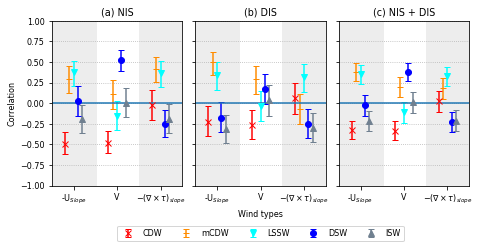

In [59]:
regionsNames = ["NIS", "DIS", "IS"]

titles1 = ["(a) NIS", "(b) DIS", "(c) NIS + DIS"] 

pltwmthk.plot_WaterMass_Correlation_byRegion_CI(waterMassThickness, regionsName=regionsNames, titles=titles1, save=True, 
                                    savename="./Images/waterMassBudgets2/windWaterMassCorrelation_A1_A2.pdf", 
                                                mrows=1, ncols=3, ht=4)

In [6]:
selA1 = waterMassThickness.region.str.contains("NIS")
selA2 = waterMassThickness.region.str.contains("DIS")

In [14]:
calculate_pvalues(waterMassThickness[selA1].dropna(), retValue="r")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


<class 'pandas.core.frame.DataFrame'>


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month,stress_curl_slope_MonMean,u10MonMean,v10MonMean,u10SlopeMonMean,v10SlopeMonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
DSW,1,0.0927237,-0.274038,-0.23232,-0.351126,0.142164,0.0581062,-0.460438,0.233,0.528943,-0.0319891,0.643586,0.0319891,0.460438,0.00997909
ISW,0.0927237,1,-0.0426308,-0.180978,-0.32881,0.079107,0.0908898,-0.0318229,0.2282,0.00603812,0.195801,0.1681,-0.195801,0.0318229,0.173153
LSSW,-0.274038,-0.0426308,1,0.317928,-0.238174,-0.178943,0.0972181,0.407804,-0.357742,-0.154577,-0.375047,-0.137131,0.375047,-0.407804,-0.429466
mCDW,-0.23232,-0.180978,0.317928,1,-0.217309,0.0152625,-0.134311,0.0884541,-0.390144,0.109389,-0.292352,-0.00578284,0.292352,-0.0884541,-0.400121
CDW,-0.351126,-0.32881,-0.238174,-0.217309,1,0.278171,-0.131031,0.257176,0.377157,-0.482812,0.494265,-0.597729,-0.494265,-0.257176,0.497694
zlowest,0.142164,0.079107,-0.178943,0.0152625,0.278171,1,-0.354414,-0.0774289,0.443988,0.0353144,0.393576,0.078766,-0.393576,0.0774289,0.302302
month,0.0581062,0.0908898,0.0972181,-0.134311,-0.131031,-0.354414,1,0.0368515,-0.0795857,-0.0552728,-0.0632473,-0.0711131,0.0632473,-0.0368515,-0.0257273
stress_curl_slope_MonMean,-0.460438,-0.0318229,0.407804,0.0884541,0.257176,-0.0774289,0.0368515,1,-0.0777619,-0.798896,0.0947097,-0.688546,-0.0947097,-1,0.159684
u10MonMean,0.233,0.2282,-0.357742,-0.390144,0.377157,0.443988,-0.0795857,-0.0777619,1,-0.122885,0.835195,-0.0641089,-0.835195,0.0777619,0.480598
v10MonMean,0.528943,0.00603812,-0.154577,0.109389,-0.482812,0.0353144,-0.0552728,-0.798896,-0.122885,1,-0.398715,0.932548,0.398715,0.798896,-0.442532


In [16]:
calculate_pvalues(waterMassThickness[selA2].dropna(), retValue="CI")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


<class 'pandas.core.frame.DataFrame'>


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month,stress_curl_slope_MonMean,u10MonMean,v10MonMean,u10SlopeMonMean,v10SlopeMonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
DSW,"[1.0, 1.0]","[0.3628029322686938, 0.6405251131724183]","[-0.3299276351467427, 0.036190878954499836]","[-0.2708031664894459, 0.10087908685785857]","[-0.5042668007510349, -0.1742609881790278]","[-0.283640916316371, 0.08709539351723158]","[-0.05977065935496103, 0.3087035403911042]","[-0.27315348283753077, 0.0983662136038882]","[0.1160120936504814, 0.45856332011886247]","[-0.010796981781637483, 0.35237802942392094]","[-0.012051467549534541, 0.35127868448442534]","[0.20973373114182747, 0.5312223662436611]","[-0.35127868448442534, 0.012051467549534541]","[-0.0983662136038882, 0.27315348283753077]","[0.014730835387473426, 0.37453323091818974]"
ISW,"[0.3628029322686938, 0.6405251131724183]","[1.0, 1.0]","[-0.19762806713489728, 0.17681282791892067]","[-0.20674832952810554, 0.16758580133848405]","[-0.5104981920933251, -0.18238590378979255]","[-0.11692432812029777, 0.2556906721264027]","[-0.25599695993766625, 0.11660105597090407]","[-0.2359718374783588, 0.1375717547035756]","[0.20443762717072186, 0.5272387951469136]","[-0.15313872473464424, 0.22089875645895443]","[0.13663278526735506, 0.4749526988768488]","[0.011511435220270046, 0.37176162064212226]","[-0.4749526988768488, -0.13663278526735506]","[-0.1375717547035756, 0.2359718374783588]","[-0.025194186587086758, 0.33970076598675425]"
LSSW,"[-0.3299276351467427, 0.036190878954499836]","[-0.19762806713489728, 0.17681282791892067]","[1.0, 1.0]","[0.015135840692931413, 0.37488144886674807]","[-0.43171252625673995, -0.08285545886469448]","[-0.3382962784948267, 0.026779963127076846]","[-0.08833855304971397, 0.2824884987464995]","[0.06499690490934061, 0.4169895742170357]","[-0.555804511433904, -0.24283814398224052]","[-0.21980533967226412, 0.15426079313107735]","[-0.4963987990256721, -0.16406593548909576]","[-0.1813005164280238, 0.19316874965006672]","[0.16406593548909576, 0.4963987990256721]","[-0.4169895742170357, -0.06499690490934061]","[-0.4817687386232813, -0.14529574821847152]"
mCDW,"[-0.2708031664894459, 0.10087908685785857]","[-0.20674832952810554, 0.16758580133848405]","[0.015135840692931413, 0.37488144886674807]","[1.0, 1.0]","[-0.2917591797798027, 0.0783050534956574]","[-0.30609272153113054, 0.06264312774772865]","[-0.3521768622929406, 0.011026623339815618]","[-0.27325759997853794, 0.09825478562462636]","[-0.5185453778145208, -0.1929450979939372]","[0.11194153448705775, 0.4553002524993703]","[-0.6263243887937987, -0.34203127381834453]","[0.1581478919951157, 0.4918063819163674]","[0.34203127381834453, 0.6263243887937987]","[-0.09825478562462636, 0.27325759997853794]","[-0.5240473445792669, -0.2002082280873502]"
CDW,"[-0.5042668007510349, -0.1742609881790278]","[-0.5104981920933251, -0.18238590378979255]","[-0.43171252625673995, -0.08285545886469448]","[-0.2917591797798027, 0.0783050534956574]","[1.0, 1.0]","[0.48226483789263097, 0.7186681806636369]","[-0.31706466996035987, 0.05053035025313346]","[-0.09491901208589439, 0.2763704863270189]","[0.02434879488939325, 0.38277529610066313]","[-0.43553952243184557, -0.08753448654247406]","[0.04302319548507436, 0.39861693838868384]","[-0.5412393438690716, -0.22313505157412408]","[-0.39861693838868384, -0.04302319548507436]","[-0.2763704863270189, 0.09491901208589439]","[0.055184266473639235, 0.40882043298636367]"
zlowest,"[-0.283640916316371, 0.08709539351723158]","[-0.11692432812029777, 0.2556906721264027]","[-0.3382962784948267, 0.026779963127076846]","[-0.30609272153113054, 0.06264312774772865]","[0.48226483789263097, 0.7186681806636369]","[1.0, 1.0]","[-0.4000073714789521, -0.04467420990106108]","[-0.006847368193706252, 0.355832665793919]","[0.334801559887291, 0.6213370689416583]","[-0.542376235068927, -0.22466369003781672]","[0.39853489265872794, 0.6645171208250392]","[-0.5347231300299454, -0.21440357510144745]","[-0.6645171208250392, -0.39853489265872794]","[-0.3558326657

In [23]:
selA1 = waterMassThickness.groupby("region").sum().index.str.contains("NIS")
selA2 = waterMassThickness.groupby("region").sum().index.str.contains("DIS")

In [26]:
calculate_pvalues(waterMassThickness.groupby("region").sum()[selA1], retValue="CI")

/home/km/anaconda3/envs/pyocean35/lib/python3.6/site-packages/ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in arctanh


<class 'pandas.core.frame.DataFrame'>


,DSW,ISW,LSSW,mCDW,CDW,zlowest,month,stress_curl_slope_MonMean,u10MonMean,v10MonMean,u10SlopeMonMean,v10SlopeMonMean,neg_u10SlopeMonMean,neg_stress_curl,ShelfWidth
DSW,"[1.0, 1.0]","[-0.13348155234524905, 0.8250271808225322]","[-0.7749502008334441, 0.26737975301155503]","[-0.759311185545099, 0.30230660830671063]","[-0.8166125762272931, 0.15872525835112072]","[-0.27970047807255094, 0.7695753790103834]","[0.0, 0.0]","[-0.8646411570420334, -0.004804584938789095]","[-0.3213302286529317, 0.7502439289134737]","[0.21381465825320883, 0.9093589844843725]","[-0.5917181412974132, 0.5555247224578848]","[0.5961954298491439, 0.9635916536996693]","[-0.5555247224578848, 0.5917181412974132]","[0.004804584938789095, 0.8646411570420334]","[-0.5572300030068357, 0.5901107256701882]"
ISW,"[-0.13348155234524905, 0.8250271808225322]","[1.0, 1.0]","[-0.5909467572317548, 0.5563442771487073]","[-0.7043720928429155, 0.40592070018833487]","[-0.8240983827841575, 0.1363303693101737]","[-0.36657294242251204, 0.7269291532695348]","[0.0, 0.0]","[-0.6129569126786296, 0.5320487227390872]","[-0.2751680319040607, 0.7715700634413016]","[-0.5528450664278808, 0.5942257166886461]","[-0.31655707084066537, 0.752557487462339]","[-0.34023352959557346, 0.7408162448187611]","[-0.752557487462339, 0.31655707084066537]","[-0.5320487227390872, 0.6129569126786296]","[-0.3632352672526051, 0.7287398145706395]"
LSSW,"[-0.7749502008334441, 0.26737975301155503]","[-0.5909467572317548, 0.5563442771487073]","[1.0, 1.0]","[-0.0732009214378117, 0.8435369143656701]","[-0.7730668530204482, 0.2717360987462585]","[-0.8220349703307588, 0.14260294783127384]","[0.0, 0.0]","[-0.09022997220117937, 0.8385197541525586]","[-0.8059913578998856, 0.18886655301296662]","[-0.7070330883784027, 0.40148365740440134]","[-0.8236472279858326, 0.13770844687710795]","[-0.6878520135538602, 0.4323434964219309]","[-0.13770844687710795, 0.8236472279858326]","[-0.8385197541525586, 0.09022997220117937]","[-0.8711295461896171, -0.031092267125884844]"
mCDW,"[-0.759311185545099, 0.30230660830671063]","[-0.7043720928429155, 0.40592070018833487]","[-0.0732009214378117, 0.8435369143656701]","[1.0, 1.0]","[-0.7364588037968705, 0.3486849719401848]","[-0.7049896793995691, 0.40489555667311145]","[0.0, 0.0]","[-0.5276496065921411, 0.6167608527841001]","[-0.8385275049627161, 0.09020407697730475]","[-0.4584653648315319, 0.6702936440206327]","[-0.7835636636645085, 0.24689780708128659]","[-0.5739088355894041, 0.5738943983439713]","[-0.24689780708128659, 0.7835636636645085]","[-0.6167608527841001, 0.5276496065921411]","[-0.8523210528214349, 0.04204080542036158]"
CDW,"[-0.8166125762272931, 0.15872525835112072]","[-0.8240983827841575, 0.1363303693101737]","[-0.7730668530204482, 0.2717360987462585]","[-0.7364588037968705, 0.3486849719401848]","[1.0, 1.0]","[-0.20537192858421577, 0.7998904348992373]","[0.0, 0.0]","[-0.3654062931257395, 0.7275637841098054]","[-0.1275465362008741, 0.8269456790443468]","[-0.8436836990529121, 0.07269453005866233]","[0.09540426030295451, 0.8858559599468263]","[-0.8952816651390476, -0.1403490329107019]","[-0.8858559599468263, -0.09540426030295451]","[-0.7275637841098054, 0.3654062931257395]","[-0.03423495018674713, 0.85444526007721]"
zlowest,"[-0.27970047807255094, 0.7695753790103834]","[-0.36657294242251204, 0.7269291532695348]","[-0.8220349703307588, 0.14260294783127384]","[-0.7049896793995691, 0.40489555667311145]","[-0.20537192858421577, 0.7998904348992373]","[1.0, 1.0]","[0.0, 0.0]","[-0.6657193567956688, 0.46496475768702916]","[0.48522185066000023, 0.9504517194713608]","[-0.5453136603013908, 0.6011560514696104]","[0.4428159447527264, 0.9449495718107589]","[-0.5050445459902452, 0.6354994063638039]","[-0.9449495718107589, -0.4428159447527264]","[-0.46496475768702916, 0.6657193567956688]","[-0.08798243999126297, 0.8391910761216517]"
month,"[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[0.0, 0.0]","[